<a href="https://colab.research.google.com/github/ZamsWorld/KapitaSelekta/blob/main/kapitaSelekta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Filenya

In [ ]:
from google.colab import files
uploaded = files.upload()

Melihat isi Data

In [ ]:
import pandas as pd

# Load CSV file
data = pd.read_csv('sample_data/most_subscribed_youtube_channels.csv')  # Ganti 'nama_file.csv' dengan nama file yang sesuai

# Menampilkan 5 baris pertama untuk melihat data
print(data.head())


   rank                    Youtuber  subscribers      video views video count  \
0     1                    T-Series  222,000,000  198,459,090,822      17,317   
1     2              YouTube Movies  154,000,000                0           0   
2     3  Cocomelon - Nursery Rhymes  140,000,000  135,481,339,848         786   
3     4                   SET India  139,000,000  125,764,252,686      91,271   
4     5                       Music  116,000,000                0           0   

           category  started  
0             Music     2006  
1  Film & Animation     2015  
2         Education     2006  
3             Shows     2006  
4               NaN     2013  


Preprocessing Data

In [ ]:
# Menyusun fitur dan target variabel (misalnya jika data adalah untuk klasifikasi)
X = data.drop(['Youtuber', 'subscribers'], axis=1)  # Ganti 'target' dengan nama kolom target Anda
y = data['subscribers']  # Ganti 'target' dengan nama kolom target Anda
# Membagi data menjadi data latih (training) dan data uji (test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Menggunakan One-Hot Encoding untuk kolom 'Category'
X = pd.get_dummies(X, columns=['category'], drop_first=True)

In [ ]:
# Import necessary library
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X is your DataFrame

# Convert columns with commas to numeric
for column in X.select_dtypes(include=['object']).columns:  # Select object type columns (likely strings)
    try:
        X[column] = X[column].str.replace(',', '').astype(float)  # Remove commas and convert to float
    except ValueError:
        # Handle columns that cannot be converted (if any) - here, it just prints an error message
        print(f"Could not convert column '{column}' to numeric.")

# Now apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Data Training dan Testing

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Membangun dan Melatih model Pengklasifikasian berdasarkan Category, Menggunakan RandomForestClassifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membangun model RandomForestClassifier untuk klasifikasi
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Evaluasi model menggunakan data uji
from sklearn.metrics import accuracy_score

# Prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.1350


In [ ]:
import joblib

# Menyimpan model ke dalam file .pkl
joblib.dump(model, 'youtube_model.pkl')

# Download model .pkl
from google.colab import files
files.download('youtube_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

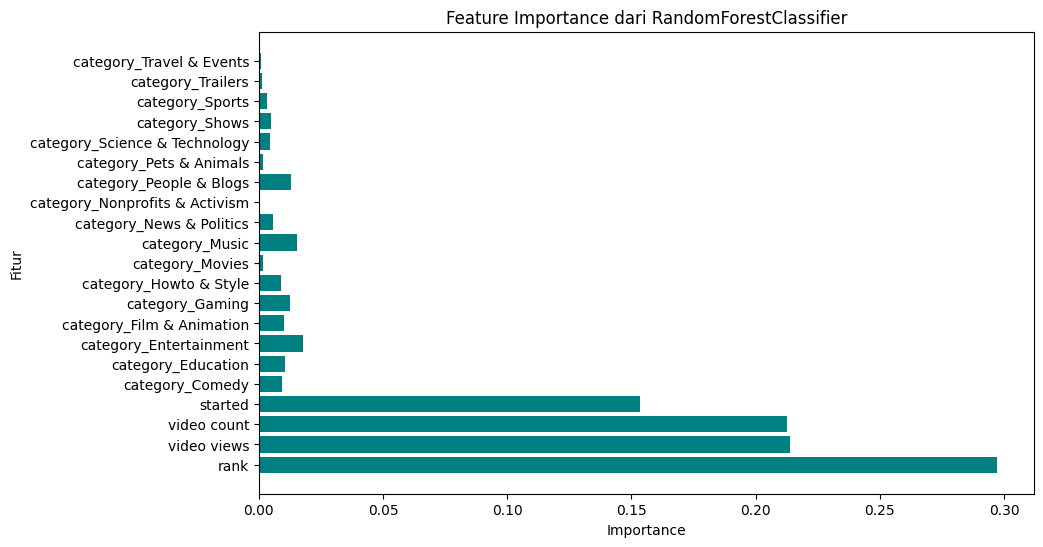

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Membangun dan melatih model RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Gantilah X_train dan y_train dengan data yang sesuai

# Mendapatkan pentingnya fitur (Feature Importance)
feature_importance = model.feature_importances_

# Visualisasi pentingnya fitur
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, color='teal')
plt.title('Feature Importance dari RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.show()